In [1]:
### Chargement des librairies
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'tidyverse' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'tibble' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'tidyr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'readr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'purrr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'stringr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'forcats' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'lubridate' a été compilé avec la version R 4.4.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ 

In [2]:
###Chargement et Affichage
path <- ""
data <- read.table(paste(path, "healthcare_synthetic_data.csv", sep = ""),
                    sep = ",", header = TRUE)

#head(data)

#summary(data)


In [3]:
head(data)

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,PID-00001,60,0,146.9,51.3,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0
2,PID-00002,53,0,161.8,76.6,29.3,128,81,203,119,38,116,0,0,1,0,7,9,0
3,PID-00003,62,1,174.7,92.4,30.3,141,100,173,124,45,90,0,0,0,0,1,7,1
4,PID-00004,73,1,173.3,68.9,22.9,136,96,193,117,45,81,0,0,1,0,2,7,1
5,PID-00005,52,1,178.6,79.8,25.0,122,80,236,153,41,79,0,1,2,0,2,6,0
6,PID-00006,52,0,159.6,60.3,23.7,134,92,225,155,48,103,0,0,1,1,4,8,0


In [4]:
###transfo des vars qualitatives en quantitatives et suppresion de la colonne Patient_ID
data[, "Heart_Disease_Risk"] <- as.factor(data[, "Heart_Disease_Risk"])
data[, "Gender"] <- as.factor(data[, "Gender"])
data[, "Smoking_Status"] <- as.factor(data[, "Smoking_Status"])
data[, "Alcohol_Consumption"] <- as.factor(data[, "Alcohol_Consumption"])
data[, "Physical_Activity_Level"] <- as.factor(data[, "Physical_Activity_Level"])
data[, "Family_History"] <- as.factor(data[, "Family_History"])
data[, "Sleep_Hours"] <- as.factor(data[, "Sleep_Hours"])  #Sleep_Hours semble qualitative (6 modalités environ)
data[, "Stress_Level"] <- as.factor(data[, "Stress_Level"]) #Stress_Level semble qualitative (10 modalités environ)
data$Patient_ID <- NULL
#summary(data)



In [7]:
head(data)

,Age,Gender,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,60,0,146.9,51.3,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0
2,53,0,161.8,76.6,29.3,128,81,203,119,38,116,0,0,1,0,7,9,0
3,62,1,174.7,92.4,30.3,141,100,173,124,45,90,0,0,0,0,1,7,1
4,73,1,173.3,68.9,22.9,136,96,193,117,45,81,0,0,1,0,2,7,1
5,52,1,178.6,79.8,25.0,122,80,236,153,41,79,0,1,2,0,2,6,0
6,52,0,159.6,60.3,23.7,134,92,225,155,48,103,0,0,1,1,4,8,0


In [5]:
###Création de 2 DataFrame dinstincts pour variables quantitatives et qualitatives  
data_quant <- select(data, where(is.numeric))
data_qual  <- select(data, !where(is.numeric))

summary(data_qual)
summary(data_quant)
###création des colonnes contenant les noms des vars qualitatives et quantitatives
vars_quant <- names(data)[sapply(data, is.numeric)]
vars_qual <- names(data)[sapply(data, function(x) !is.numeric(x))]

 Gender   Smoking_Status Alcohol_Consumption Physical_Activity_Level
 0:7622   0:10495        0:7502              0:3020                 
 1:7378   1: 4505        1:5939              1:6009                 
                         2:1559              2:4453                 
                                             3:1518                 
                                                                    
                                                                    
                                                                    
 Family_History  Stress_Level  Sleep_Hours Heart_Disease_Risk
 0:12757        10     :1530   4 : 727     0:8460            
 1: 2243        4      :1518   5 :2303     1:6540            
                8      :1518   6 :4433                       
                1      :1507   7 :4491                       
                6      :1505   8 :2374                       
                5      :1499   9 : 579                       
              

      Age          Height_cm       Weight_kg           BMI       
 Min.   :25.00   Min.   :138.5   Min.   : 33.70   Min.   :14.50  
 1st Qu.:46.00   1st Qu.:158.5   1st Qu.: 65.20   1st Qu.:24.50  
 Median :55.00   Median :164.7   Median : 73.90   Median :27.20  
 Mean   :54.54   Mean   :165.3   Mean   : 75.25   Mean   :27.45  
 3rd Qu.:63.00   3rd Qu.:172.0   3rd Qu.: 83.90   3rd Qu.:30.00  
 Max.   :85.00   Max.   :198.1   Max.   :150.10   Max.   :46.10  
  Systolic_BP     Diastolic_BP    Cholesterol_Total Cholesterol_LDL
 Min.   : 90.0   Min.   : 60.00   Min.   :127.0     Min.   : 70.0  
 1st Qu.:127.0   1st Qu.: 85.00   1st Qu.:201.0     1st Qu.:128.0  
 Median :135.0   Median : 91.00   Median :216.0     Median :140.0  
 Mean   :135.1   Mean   : 90.54   Mean   :216.2     Mean   :140.4  
 3rd Qu.:143.0   3rd Qu.: 96.00   3rd Qu.:231.0     3rd Qu.:152.0  
 Max.   :182.0   Max.   :120.00   Max.   :303.0     Max.   :210.0  
 Cholesterol_HDL Fasting_Blood_Sugar
 Min.   :20.00   Min.   :

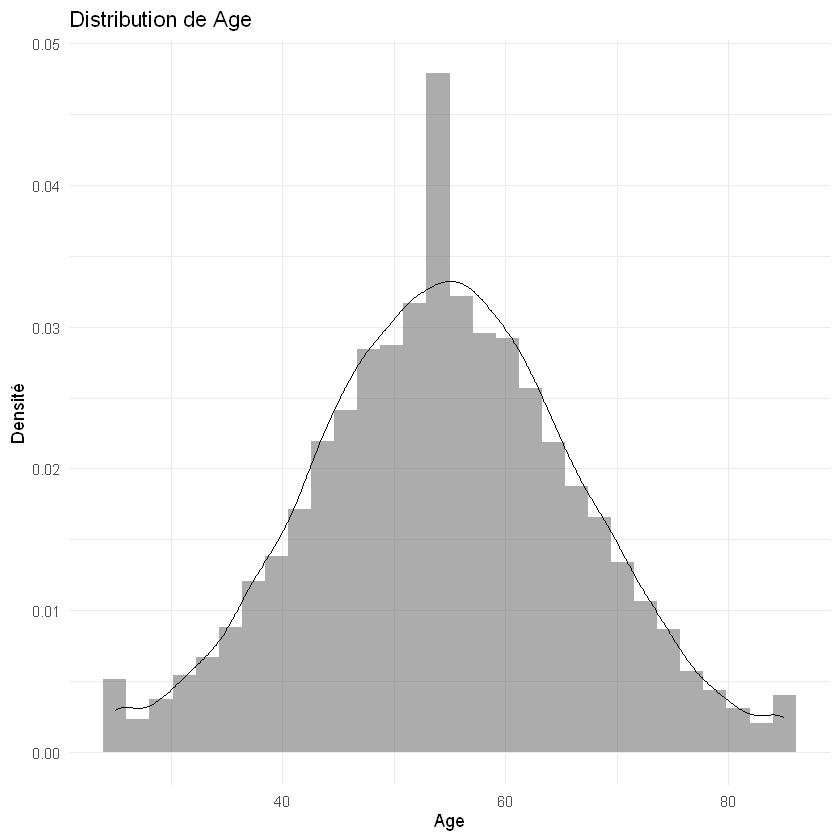

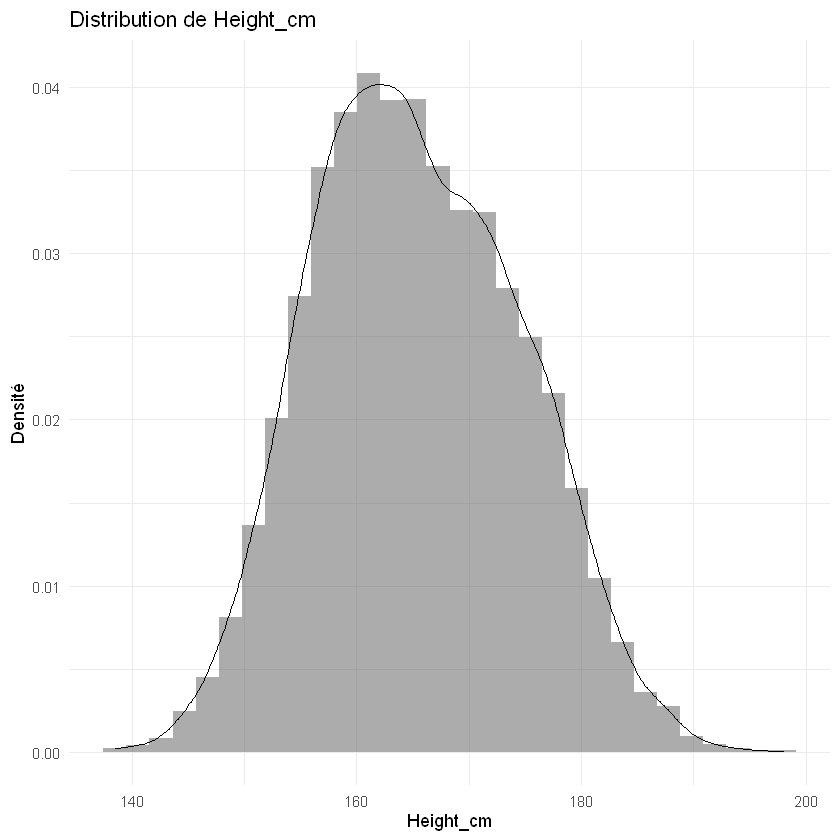

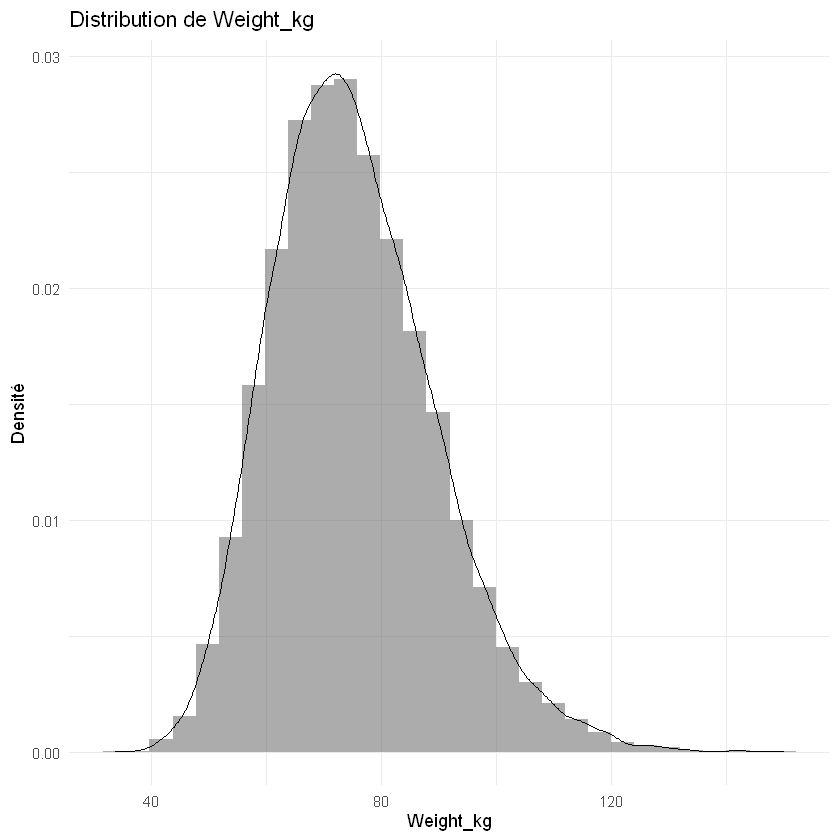

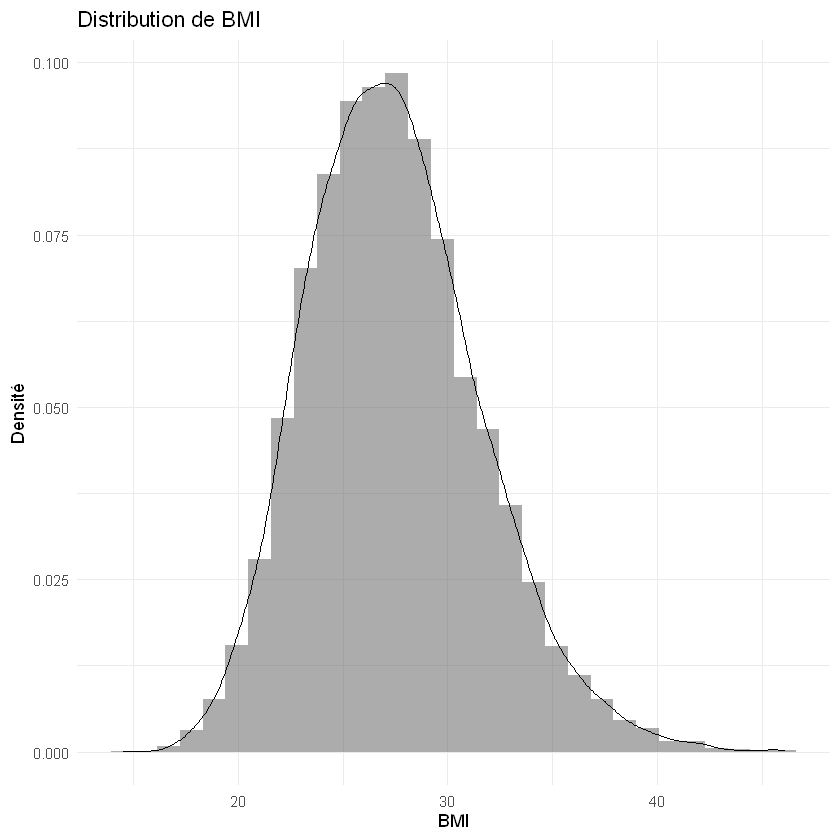

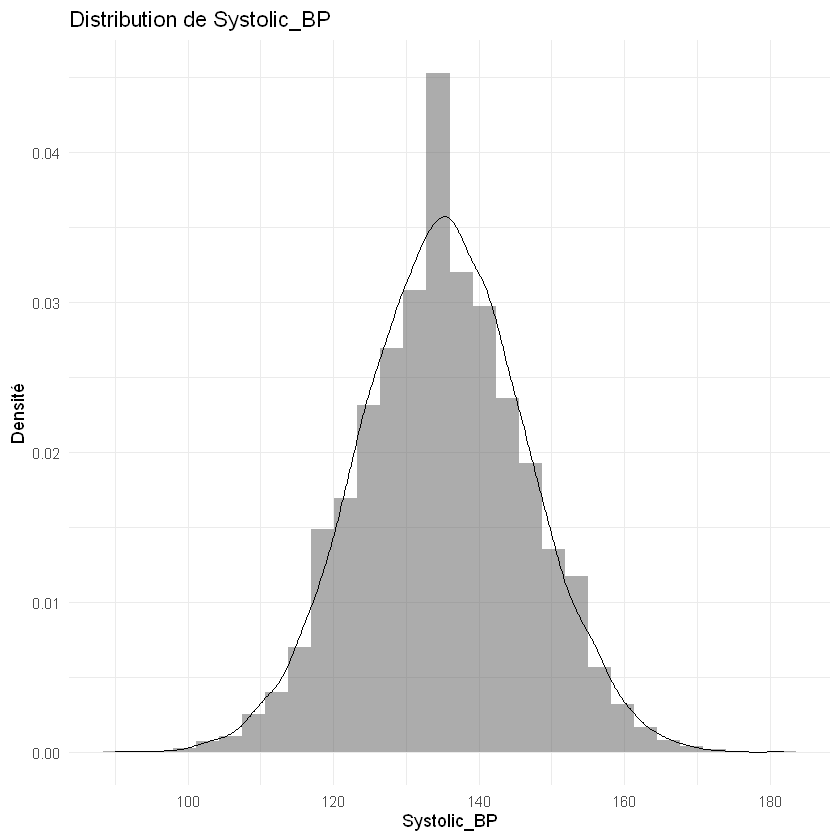

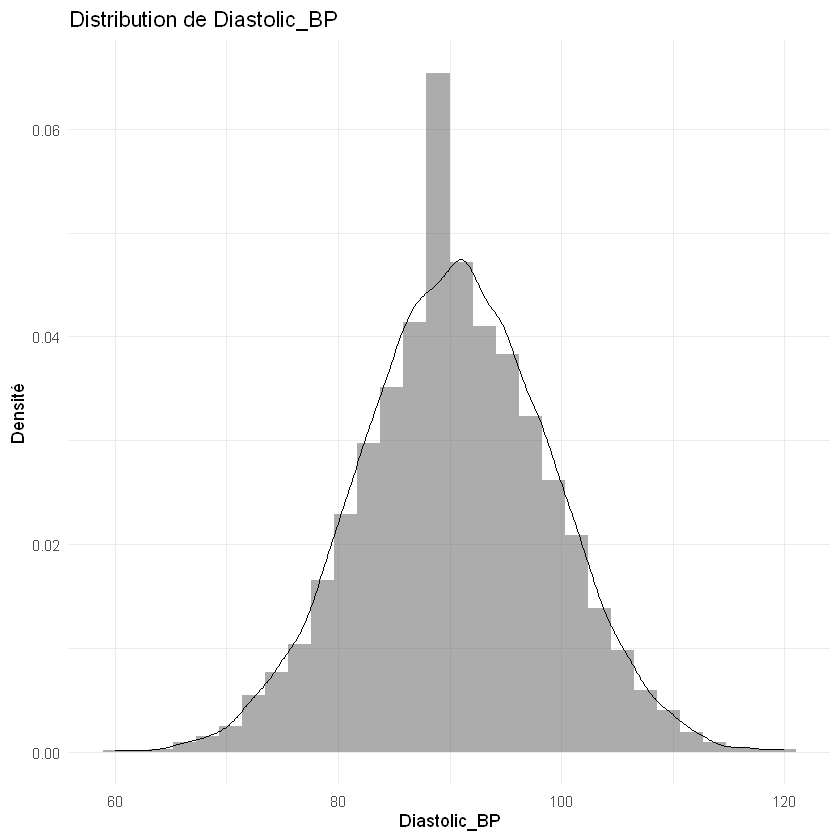

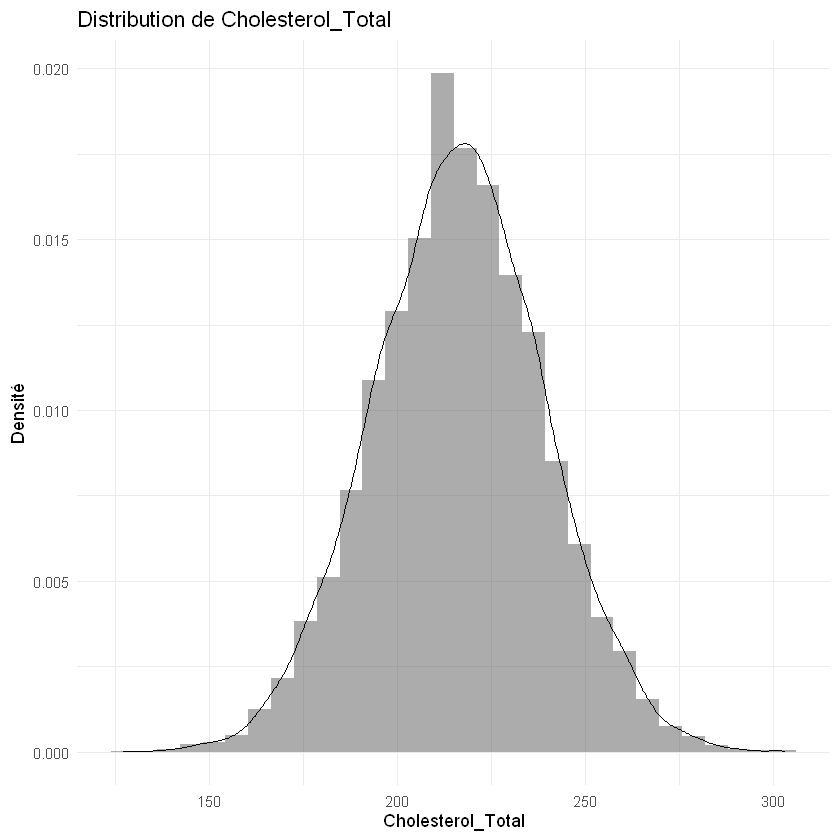

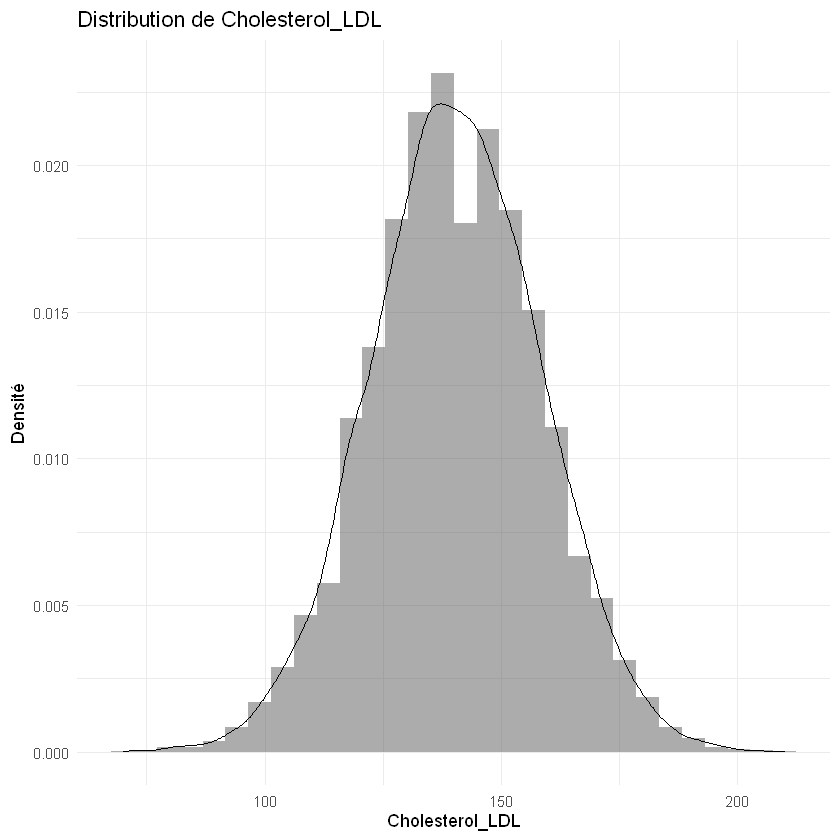

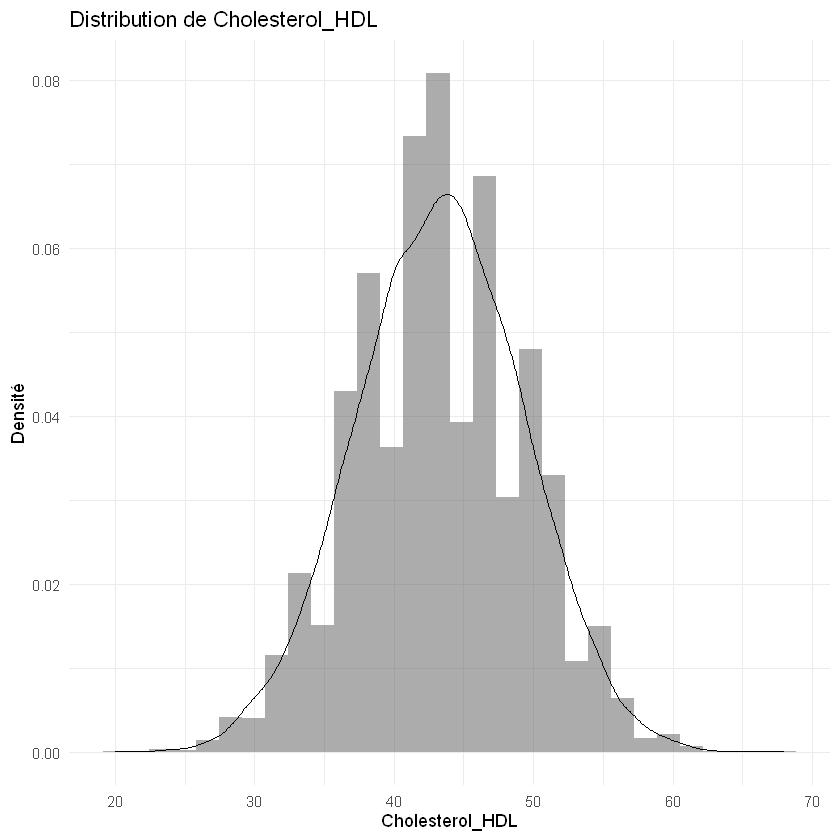

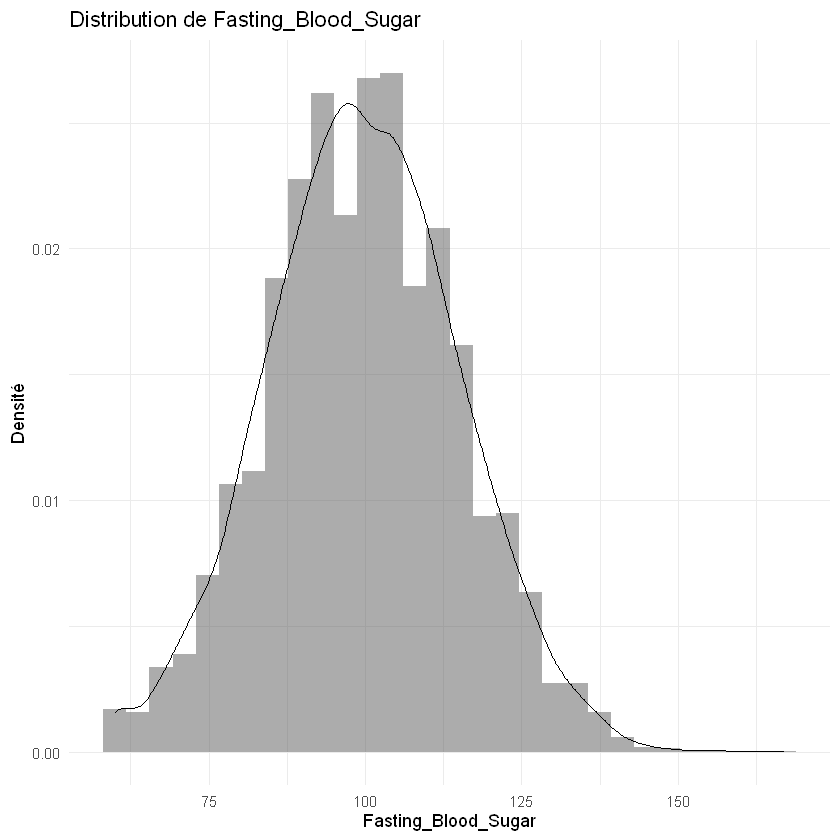

In [6]:
###fonction générant histogramme montrant distribution de Var_X 
histo_compare <- function(var_name) {
    g<-ggplot(data, aes(x = .data[[var_name]])) +
    geom_histogram(aes(y = after_stat(density)), 
                   bins = 30, 
                   alpha = 0.5, 
                   position = "identity") +
    geom_density(alpha = 0.2) +
    theme_minimal() +
    labs(title = paste("Distribution de", var_name),
         x = var_name,
         y = "Densité") 
    return(g)
}
for (v in vars_quant) {
  p <- histo_compare(v)
  print(p) 
}



Transformations pour obtenir des distributions plus symétriques et ainsi plus "gaussiennes".

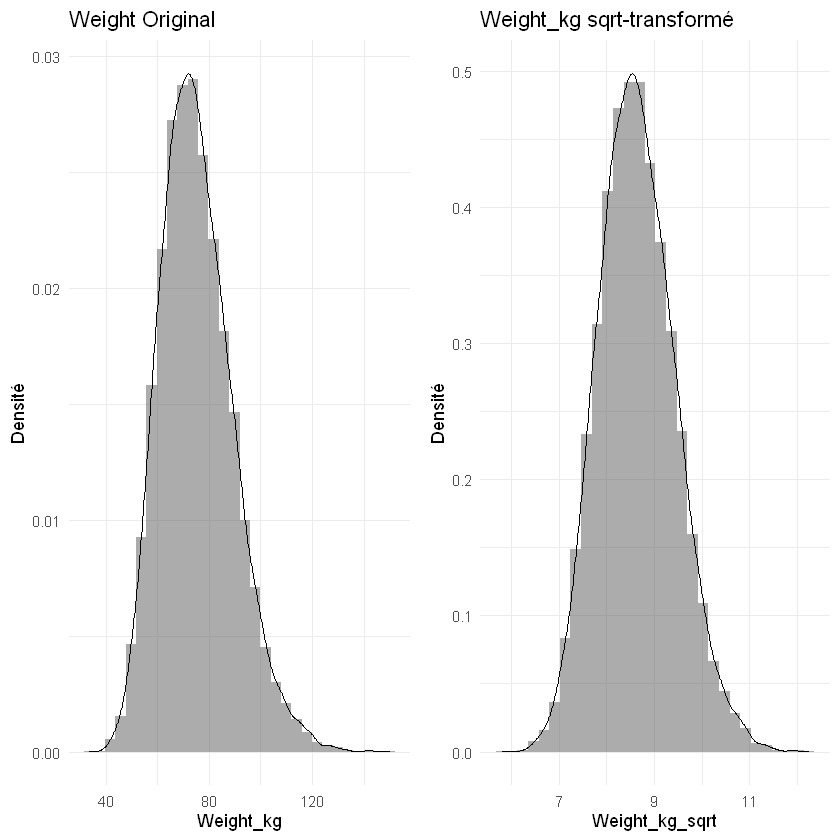

[1] "Age"                      "Gender"                  
 [3] "Height_cm"                "Weight_kg"               
 [5] "BMI"                      "Systolic_BP"             
 [7] "Diastolic_BP"             "Cholesterol_Total"       
 [9] "Cholesterol_LDL"          "Cholesterol_HDL"         
[11] "Fasting_Blood_Sugar"      "Smoking_Status"          
[13] "Alcohol_Consumption"      "Physical_Activity_Level" 
[15] "Family_History"           "Stress_Level"            
[17] "Sleep_Hours"              "Heart_Disease_Risk"      
[19] "Weight_kg_sqrt"           "Fasting_Blood_Sugar_sqrt"

[1] "Age"                      "Gender"                  
 [3] "Height_cm"                "BMI"                     
 [5] "Systolic_BP"              "Diastolic_BP"            
 [7] "Cholesterol_Total"        "Cholesterol_LDL"         
 [9] "Cholesterol_HDL"          "Smoking_Status"          
[11] "Alcohol_Consumption"      "Physical_Activity_Level" 
[13] "Family_History"           "Stress_Level"            
[15] "Sleep_Hours"              "Heart_Disease_Risk"      
[17] "Weight_kg_sqrt"           "Fasting_Blood_Sugar_sqrt"

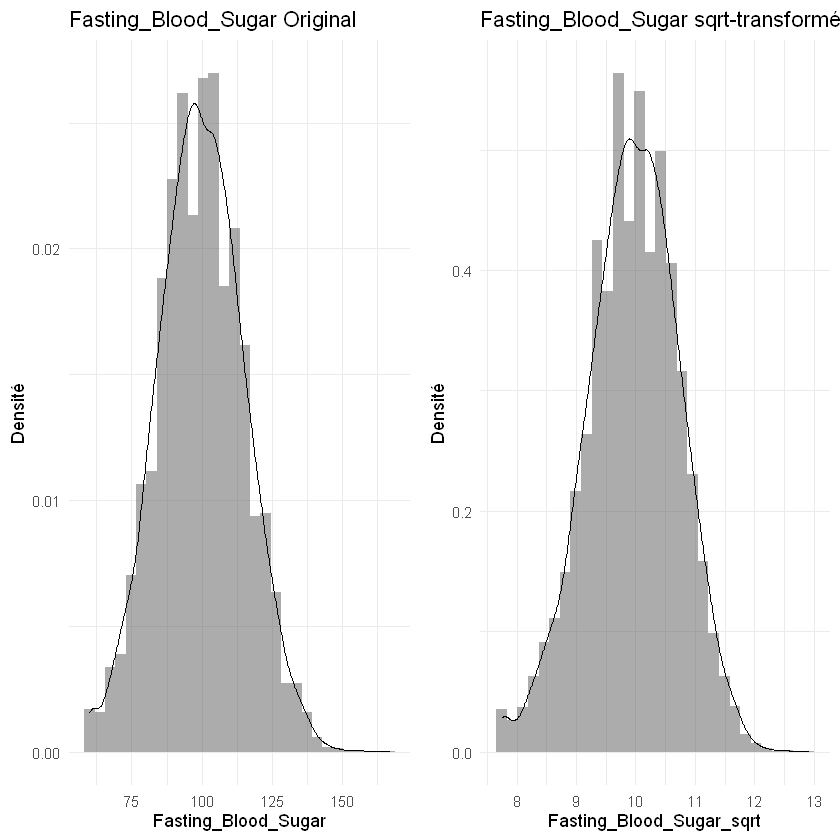

In [8]:
# Test de transformation 1 
data$Weight_kg_sqrt <- sqrt(data$Weight_kg)

p1 <- histo_compare("Weight_kg") + labs(title = "Weight Original")
p2 <- histo_compare("Weight_kg_sqrt") + labs(title = "Weight_kg sqrt-transformé") 

grid.arrange(p1, p2, ncol = 2)

# Test de transformation 2
data$Fasting_Blood_Sugar_sqrt <- sqrt(data$Fasting_Blood_Sugar)

p1 <- histo_compare("Fasting_Blood_Sugar") + labs(title = "Fasting_Blood_Sugar Original")
p2 <- histo_compare("Fasting_Blood_Sugar_sqrt") + labs(title = "Fasting_Blood_Sugar sqrt-transformé") 

grid.arrange(p1, p2, ncol = 2)
names(data)
data <- data[, c(1:3,5:10,12:20)]
names(data)
###pas sur de l'utilité des transfos



In [11]:
data_standardisees <- scale(data_quant, center = TRUE, scale = TRUE)

###Création de 2 DataFrame dinstincts pour variables quantitatives et qualitatives  
data_quant <- select(data_standardisees, where(is.numeric))
data_qual  <- select(data_standardisees, !where(is.numeric))

summary(data_qual)
summary(data_quant)
###création des colonnes contenant les noms des vars qualitatives et quantitatives
vars_quant <- names(data)[sapply(data_standardisees, is.numeric)]
vars_qual <- names(data)[sapply(data_standardisees, function(x) !is.numeric(x))]

ggpairs(data_quant)

ERROR: Error in UseMethod("select"): pas de méthode pour 'select' applicable pour un objet de classe "c('matrix', 'array', 'double', 'numeric')"
